In [0]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics 
from tqdm import tqdm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/'My Drive'/viscosity
%ls

/content/drive/.shortcut-targets-by-id/1BcMRR0Kl32WRQZtpxukCL46x08j_tbx9/viscosity
'Fly ash_USC.csv'          viscosity_v2.xlsx        viscosity_v5_10.xlsx
'viscosity_10 (1).ipynb'   viscosity_v5_1000.xlsx
 viscosity.ipynb           viscosity_v5_100.xlsx


In [0]:
viscosity = pd.read_excel("viscosity_v5_10.xlsx")

In [7]:
print(viscosity.columns)

Index(['Glass_ID', 'SiO2', 'B2O3', 'Al2O3', 'MgO', 'CaO', 'BaO', 'Li2O',
       'Na2O', 'K2O', 'Cu2O', 'Rb2O', 'Ag2O', 'Cs2O', 'Tl2O', 'BeO', 'MnO',
       'FeO', 'CoO', 'NiO', 'CuO', 'ZnO', 'SrO', 'CdO', 'PbO', 'SnO', 'Cr2O3',
       'Fe2O3', 'Ga2O3', 'As2O3', 'Y2O3', 'In2O3', 'Sb2O3', 'La2O3', 'Nd2O3',
       'Gd2O3', 'Bi2O3', 'Co2O3', 'Sc2O3', 'Co3O4', 'Sb2O5', 'Ce2O3', 'Mn3O4',
       'Fe3O4', 'TiO2', 'MnO2', 'GeO2', 'ZrO2', 'CeO2', 'SnO2', 'TeO2', 'RuO2',
       'P2O5', 'V2O5', 'Nb2O5', 'Ta2O5', 'HfO2', 'Nb2O3', 'SO3', 'MoO3', 'WO3',
       'H2O', 'Sm2O3', 'Eu2O3', 'Tb2O3', 'Er2O3', 'Yb2O3', 'Lu2O3', 'Pr2O3',
       'PdO', 'Pr6O11', 'Mn2O3', 'ThO2', 'UO2', 'UO3', 'Ti2O3', 'Rh2O3',
       'prop_id', 'unit', 'log 10 value', 'Temperature_C', 'note', 'source'],
      dtype='object')


In [8]:
print(viscosity.shape)

(98935, 83)


In [9]:
np.isnan(np.array(viscosity.iloc[:,80])).sum()

30

In [10]:
viscosity.iloc[np.isnan(np.array(viscosity.iloc[:,80])),80]

5863    NaN
5864    NaN
13838   NaN
14135   NaN
14406   NaN
15008   NaN
15009   NaN
15367   NaN
15368   NaN
15369   NaN
16566   NaN
16567   NaN
17026   NaN
18380   NaN
19030   NaN
19031   NaN
19032   NaN
19051   NaN
19052   NaN
19053   NaN
19054   NaN
19055   NaN
19056   NaN
21086   NaN
21087   NaN
21186   NaN
26400   NaN
27347   NaN
33063   NaN
58681   NaN
Name: Temperature_C, dtype: float64

In [0]:
remove = [5863    ,
5864    ,
13838   ,
14135   ,
14406   ,
15008   ,
15009   ,
15367   ,
15368   ,
15369   ,
16566   ,
16567   ,
17026   ,
18380   ,
19030   ,
19031   ,
19032   ,
19051   ,
19052   ,
19053   ,
19054   ,
19055   ,
19056   ,
21086   ,
21087   ,
21186   ,
26400   ,
27347   ,
33063   ,
58681   ]

In [12]:
len(remove)

30

In [0]:
viscosity = viscosity.drop(remove)

In [14]:
viscosity.shape

(98905, 83)

In [15]:
X_idx = list(range(1,77)) + [80]
#for i in range(1,77):
#  X_idx.append(i)
#X_idx.append(80)
print(X_idx)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 80]


In [0]:
X = np.array(viscosity.iloc[:,X_idx])

In [0]:
y = np.array(viscosity.iloc[:,79])

In [18]:
X.shape

(98905, 77)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [0]:
X_train = torch.tensor(X_train, device="cuda").type(torch.float)
y_train = torch.tensor(y_train, device="cuda").type(torch.float)
X_test = torch.tensor(X_test, device="cuda").type(torch.float)
y_test = torch.tensor(y_test, device="cuda").type(torch.float)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([79124, 77]),
 torch.Size([79124]),
 torch.Size([19781, 77]),
 torch.Size([19781]))

In [25]:
X_mean = X_train.mean(dim=0)
X_std = X_train.std(dim=0)
y_mean = y_train.mean(dim=0)
y_std = y_train.std(dim=0)
X_mean.shape, X_std.shape, y_mean.shape, y_std.shape

(torch.Size([77]), torch.Size([77]), torch.Size([]), torch.Size([]))

In [0]:
class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None, target_transform=None):
        super().__init__()
        self.X = X
        self.y = y
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
            X = self.transform(X)

        if self.target_transform is not None:
            y = self.target_transform(y)
        return X, y

In [0]:
training_set = CustomDataset(X_train, 
                             y_train, 
                             transform=lambda X: ((X - X_mean)/X_std), 
                             target_transform=lambda y: ((y - y_mean)/y_std)
                          )

test_set = CustomDataset(X_test,
                        y_test,
                        transform=lambda X: ((X - X_mean)/X_std), 
                        target_transform=lambda y: ((y - y_mean)/y_std)
                    )

In [0]:
"""net = torch.nn.Sequential(
    torch.nn.Linear(51, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(128, 64),
    torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(64, 1))"""

'net = torch.nn.Sequential(\n    torch.nn.Linear(51, 256),\n    torch.nn.BatchNorm1d(256),\n    torch.nn.ReLU(),\n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(256, 512),\n    torch.nn.BatchNorm1d(512),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),   \n    torch.nn.Linear(512, 256),\n    torch.nn.BatchNorm1d(256),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(256, 128),\n    torch.nn.BatchNorm1d(128),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(128, 64),\n    torch.nn.BatchNorm1d(64),\n    torch.nn.ReLU(),  \n    torch.nn.Dropout(p=0.1),\n    torch.nn.Linear(64, 1))'

In [28]:
net = torch.nn.Sequential(
    torch.nn.Linear(77, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(128, 64),
    torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(64, 1))

batch_size = 128
epoch_total = 200
step1 = 30
step2 = 50
step3 = 80
warmup_epoch = 10

# dropout:0.5

def lr_lambda(epoch):
    #if epoch >= step3:
    #    lr = 0.001
    #elif epoch >= step2:
    #    lr = 0.01
    #elif epoch >= step1:
    #    lr = 0.1
    #else:
    #    lr = 1

  #  if epoch < warmup_epoch:
  #      lr = lr * (1 + epoch) / warmup_epoch
    lr=0.001
    return lr

optimizer = torch.optim.Adam([param for param in net.parameters() if param.requires_grad], lr=0.01, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

loss_func = torch.nn.MSELoss(reduction="none")

train_loader = DataLoader(
    dataset=training_set,
    batch_size=batch_size, 
    shuffle=True)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=batch_size, 
    shuffle=False)

net = net.cuda()

train_losses = []
test_losses = []
test_r2 = []
train_r2 = []
# start training

for epoch in range(epoch_total):
    # print('Epoch = %d' % epoch + 1)
    net.train()
    train_targets = []
    train_predictions = []
    total_loss = None
    for step, (batch_X, batch_y) in enumerate(train_loader): # for each training step
        optimizer.zero_grad()   # clear gradients for next train
        prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
        
        loss = loss_func(prediction, batch_y)     # must be (1. nn output, 2. target)
        current_loss = loss.sum()

        if total_loss is None:
            total_loss = current_loss
        else:
            total_loss += current_loss
        
        loss = loss.mean()
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        train_targets += [batch_y]
        train_predictions += [prediction]
    
    with torch.no_grad():
        train_targets = torch.cat(train_targets, dim=0)
        train_predictions = torch.cat(train_predictions, dim=0)
        total_loss = total_loss / train_targets.shape[0]
        train_losses += [total_loss.item()]
        train_r2.append(sklearn.metrics.r2_score((train_targets * y_std + y_mean).cpu().numpy(), (train_predictions * y_std + y_mean).cpu().numpy()))
        print('Epoch %d: Training Loss = %.4f' % (epoch + 1, total_loss.item()))

    with torch.no_grad():
        net.eval()
        test_targets = []
        test_predictions = []
        total_loss = None
        for (batch_X, batch_y) in test_loader: # for each training step
            prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
            current_loss = loss_func(prediction, batch_y).sum()
            if total_loss is None:
                total_loss = current_loss
            else:
                total_loss += current_loss
            test_targets += [batch_y]
            test_predictions += [prediction]
        test_targets = torch.cat(test_targets, dim=0)
        test_predictions = torch.cat(test_predictions, dim=0)
        test_r2.append(sklearn.metrics.r2_score((test_targets * y_std + y_mean).cpu().numpy(), (test_predictions * y_std + y_mean).cpu().numpy()))
        
        total_loss = total_loss / test_targets.shape[0]
        test_losses.append(total_loss.item())
        print("Epoch %d: Validation Loss = %.4f" % (epoch + 1, total_loss.item()))

    lr_scheduler.step()


Epoch 1: Training Loss = 0.6703
Epoch 1: Validation Loss = 0.3596
Epoch 2: Training Loss = 0.4141
Epoch 2: Validation Loss = 0.3093
Epoch 3: Training Loss = 0.3452
Epoch 3: Validation Loss = 0.2419
Epoch 4: Training Loss = 0.3012
Epoch 4: Validation Loss = 0.2645
Epoch 5: Training Loss = 0.2732
Epoch 5: Validation Loss = 0.2437
Epoch 6: Training Loss = 0.2613
Epoch 6: Validation Loss = 0.1969
Epoch 7: Training Loss = 0.2462
Epoch 7: Validation Loss = 0.2278
Epoch 8: Training Loss = 0.2359
Epoch 8: Validation Loss = 0.2123
Epoch 9: Training Loss = 0.2258
Epoch 9: Validation Loss = 0.1956
Epoch 10: Training Loss = 0.2194
Epoch 10: Validation Loss = 0.2037
Epoch 11: Training Loss = 0.2105
Epoch 11: Validation Loss = 0.2083
Epoch 12: Training Loss = 0.2053
Epoch 12: Validation Loss = 0.2589
Epoch 13: Training Loss = 0.1991
Epoch 13: Validation Loss = 0.3634
Epoch 14: Training Loss = 0.1922
Epoch 14: Validation Loss = 0.2535
Epoch 15: Training Loss = 0.1906
Epoch 15: Validation Loss = 0.284

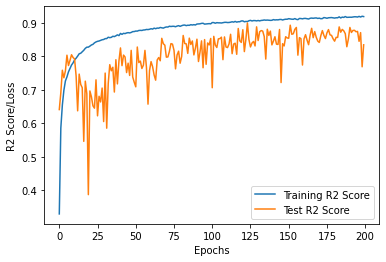

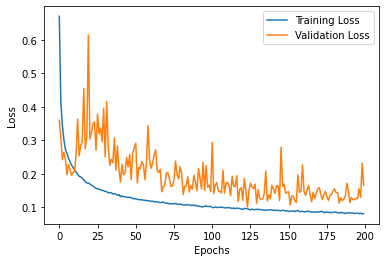

In [29]:
plt.plot(train_r2, label="Training R2 Score")
plt.plot(test_r2, label="Test R2 Score")
plt.ylabel('R2 Score/Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [30]:
train_r2

[0.3296829870866794,
 0.5858910019409838,
 0.6547525595871605,
 0.6988187685624339,
 0.7267763021311642,
 0.738703728649802,
 0.7538390233232356,
 0.7640910966818539,
 0.7742283522449577,
 0.7806304182897372,
 0.7895190474035039,
 0.794693659990107,
 0.8009212552038757,
 0.8078298309109438,
 0.8093799279324441,
 0.8140405399108981,
 0.8182644735697946,
 0.8240419337544501,
 0.8275359153017969,
 0.8276657710697091,
 0.8307000144709753,
 0.8341632273021088,
 0.8359983191439815,
 0.8404752251909047,
 0.8432049156731131,
 0.845034822211416,
 0.8460097798564885,
 0.8476850821285999,
 0.8496967640498023,
 0.8504804240397097,
 0.8530378099003375,
 0.8532124988061598,
 0.8572636964271012,
 0.8559843812342425,
 0.856877405492794,
 0.8601196802326294,
 0.8591614762153534,
 0.8614300875930174,
 0.8643951898851233,
 0.8620726295833752,
 0.8686131399706896,
 0.8658781734115095,
 0.8689037930062977,
 0.8680772087002874,
 0.8700292491050199,
 0.8709365501015451,
 0.8701503100129009,
 0.87151369629849

In [31]:
test_r2

[0.6412820921960927,
 0.6914032459822878,
 0.7587050252682292,
 0.7361735083478405,
 0.7569308135159627,
 0.8035929695995758,
 0.7727526500838462,
 0.7881761951377254,
 0.8048986871782542,
 0.7967428571054239,
 0.7922208168552942,
 0.741692310951256,
 0.6375152452345723,
 0.7471307265696111,
 0.7164008355310332,
 0.7065915347141604,
 0.5463264009043667,
 0.7260498478437952,
 0.6884682084472842,
 0.3872223152380554,
 0.6968207211024068,
 0.6794608928942938,
 0.6524935604230319,
 0.6454509974530548,
 0.7300544711681018,
 0.6225476860346912,
 0.6809419882168309,
 0.6639807011999519,
 0.7054698874884981,
 0.6054013612864415,
 0.7502234489689465,
 0.5856698422337893,
 0.7195053716365388,
 0.7753350265137725,
 0.7570256265895202,
 0.7676493271200189,
 0.693584307552189,
 0.7900784375401341,
 0.7178883015164912,
 0.786382389141099,
 0.825309853660544,
 0.7723623824091583,
 0.8038962749838668,
 0.7981571275992154,
 0.7517119334040535,
 0.7798187343881303,
 0.7431345291884797,
 0.81801314649952

In [0]:
net_target = (test_targets * y_std + y_mean).cpu().numpy()
net_pred = (test_predictions * y_std + y_mean).cpu().numpy()


In [46]:
print(min(net_pred))
error_ind = []
error_ind += list(np.where(net_pred == min(net_pred)))
print(error_ind)
net_target[error_ind[0]]

-46.99483
[array([1577])]


array([11.8929615], dtype=float32)

In [0]:
np_y_test = y_test.cpu().numpy()


In [63]:
print(np.where(np_y_test == net_target[error_ind[0]]))
val = net_target[error_ind[0]]
print(val)
y = np.array(viscosity.iloc[:, 79])

(array([1577]),)
[11.8929615]


In [64]:
np.where(y == val)

(array([], dtype=int64),)

Text(0.5, 0, 'Predicted y values (y_test)')

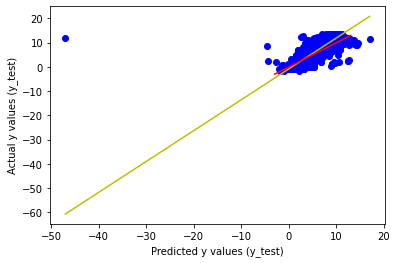

In [38]:
plt.plot(net_pred, net_target,'bo')
plt.plot(np.unique(net_pred), np.poly1d(np.polyfit(net_pred, net_target, 1))(np.unique(net_pred)), 'y-')
plt.plot([-3,13],[-3,13],'red')
plt.ylabel('Actual y values (y_test)')
plt.xlabel('Predicted y values (y_test)')


In [0]:
net = torch.nn.Sequential(
    torch.nn.Linear(77, 256),
   # torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 512),
   # torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(512, 256),
   # torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 128),
   # torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(128, 64),
  #  torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),  
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(64, 1))

batch_size = 128
epoch_total = 100
step1 = 30
step2 = 50
step3 = 80
warmup_epoch = 10

# dropout:0.5
# constant lr 
# fair/unfair dataset
# plot predicted vs true **
## only difference temperature* (only extract 1 case with unique chemicals combination) 


def lr_lambda(epoch):
    if epoch >= step3:
        lr = 0.001
    elif epoch >= step2:
        lr = 0.01
    elif epoch >= step1:
        lr = 0.1
    else:
        lr = 1

    if epoch < warmup_epoch:
        lr = lr * (1 + epoch) / warmup_epoch
    
    return lr

optimizer = torch.optim.Adam([param for param in net.parameters() if param.requires_grad], lr=0.01, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

loss_func = torch.nn.MSELoss(reduction="none")

train_loader = DataLoader(
    dataset=training_set,
    batch_size=batch_size, 
    shuffle=True)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=batch_size, 
    shuffle=False)

net = net.cuda()

train_losses = []
test_losses = []
test_r2 = []
train_r2 = []
# start training

for epoch in range(epoch_total):
    # print('Epoch = %d' % epoch + 1)
    net.train()
    train_targets = []
    train_predictions = []
    total_loss = None
    for step, (batch_X, batch_y) in enumerate(train_loader): # for each training step
        optimizer.zero_grad()   # clear gradients for next train
        prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
        
        loss = loss_func(prediction, batch_y)     # must be (1. nn output, 2. target)
        current_loss = loss.sum()

        if total_loss is None:
            total_loss = current_loss
        else:
            total_loss += current_loss
        
        loss = loss.mean()
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        train_targets += [batch_y]
        train_predictions += [prediction]
    
    with torch.no_grad():
        train_targets = torch.cat(train_targets, dim=0)
        train_predictions = torch.cat(train_predictions, dim=0)
        total_loss = total_loss / train_targets.shape[0]
        train_losses += [total_loss.item()]
        train_r2.append(sklearn.metrics.r2_score((train_targets * y_std + y_mean).cpu().numpy(), (train_predictions * y_std + y_mean).cpu().numpy()))
        print('Epoch %d: Training Loss = %.4f' % (epoch + 1, total_loss.item()))

    with torch.no_grad():
        net.eval()
        test_targets = []
        test_predictions = []
        total_loss = None
        for (batch_X, batch_y) in test_loader: # for each training step
            prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
            current_loss = loss_func(prediction, batch_y).sum()
            if total_loss is None:
                total_loss = current_loss
            else:
                total_loss += current_loss
            test_targets += [batch_y]
            test_predictions += [prediction]
        test_targets = torch.cat(test_targets, dim=0)
        test_predictions = torch.cat(test_predictions, dim=0)
        test_r2.append(sklearn.metrics.r2_score((test_targets * y_std + y_mean).cpu().numpy(), (test_predictions * y_std + y_mean).cpu().numpy()))
        
        total_loss = total_loss / test_targets.shape[0]
        test_losses.append(total_loss.item())
        print("Epoch %d: Validation Loss = %.4f" % (epoch + 1, total_loss.item()))

    lr_scheduler.step()


Epoch 1: Training Loss = 0.2155
Epoch 1: Validation Loss = 0.2014
Epoch 2: Training Loss = 0.1342
Epoch 2: Validation Loss = 0.1678
Epoch 3: Training Loss = 0.1257
Epoch 3: Validation Loss = 0.1045
Epoch 4: Training Loss = 0.1324
Epoch 4: Validation Loss = 0.1608
Epoch 5: Training Loss = 0.1477
Epoch 5: Validation Loss = 0.1819
Epoch 6: Training Loss = 0.1578
Epoch 6: Validation Loss = 0.1596
Epoch 7: Training Loss = 0.1713
Epoch 7: Validation Loss = 0.1482
Epoch 8: Training Loss = 0.1754
Epoch 8: Validation Loss = 0.4029
Epoch 9: Training Loss = 0.2992
Epoch 9: Validation Loss = 1.9739
Epoch 10: Training Loss = 0.3217
Epoch 10: Validation Loss = 0.2751
Epoch 11: Training Loss = 0.2693
Epoch 11: Validation Loss = 0.2123
Epoch 12: Training Loss = 0.2819
Epoch 12: Validation Loss = 0.2491
Epoch 13: Training Loss = 0.2601
Epoch 13: Validation Loss = 0.2236
Epoch 14: Training Loss = 2.1639
Epoch 14: Validation Loss = 0.4482
Epoch 15: Training Loss = 0.4049
Epoch 15: Validation Loss = 0.255

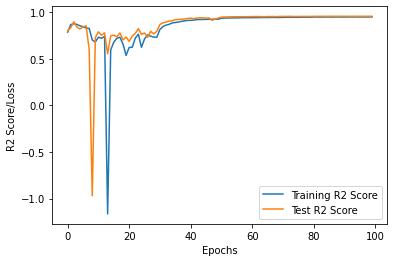

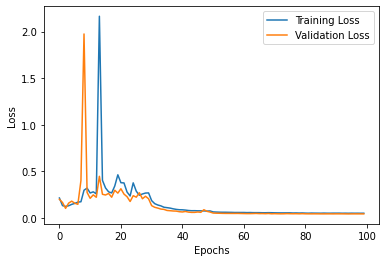

In [0]:
plt.plot(train_r2, label="Training R2 Score")
plt.plot(test_r2, label="Test R2 Score")
plt.ylabel('R2 Score/Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
train_r2

[0.7844997450022778,
 0.8658181681065475,
 0.8742730960725149,
 0.867581661769703,
 0.8523313561951696,
 0.842181412846363,
 0.8287020853363912,
 0.8245859240582871,
 0.7007495957317942,
 0.6783363298790452,
 0.7306842300307672,
 0.718073543527618,
 0.7398479818537966,
 -1.1639098050167935,
 0.595136560959298,
 0.676576807677764,
 0.7182879317423794,
 0.7300445380753624,
 0.6558061882615429,
 0.5356573774494924,
 0.6202199418854928,
 0.6226570987954049,
 0.7204631719699932,
 0.7626207022219229,
 0.6219260174714343,
 0.7115054873236262,
 0.7545542676472263,
 0.7411470061567412,
 0.7312936555197658,
 0.729702518935622,
 0.8125463026530668,
 0.8449249306972689,
 0.8593707844607887,
 0.8685111689457855,
 0.8833608849942876,
 0.8876803448132259,
 0.8925153506461657,
 0.9002136189774621,
 0.9062478794701766,
 0.9101082182588092,
 0.9108217900897614,
 0.913979954164696,
 0.9182760679800861,
 0.920569784385441,
 0.920187122422218,
 0.9214817472970042,
 0.9217053914830563,
 0.9226648666302124,


In [0]:
test_r2

[0.7990585183941743,
 0.8326250069798793,
 0.8957825912561754,
 0.8395425845953101,
 0.81850617711697,
 0.8407570540152123,
 0.8521575780336128,
 0.5981165133104748,
 -0.9691480465832885,
 0.725523889054382,
 0.7881985659692766,
 0.7515132297909721,
 0.776978617182946,
 0.5528498216449114,
 0.7451615750264702,
 0.7526493968566808,
 0.7360141463269378,
 0.7763004892536773,
 0.7017707957941148,
 0.7325249603296624,
 0.6858661962851853,
 0.7428725202843117,
 0.7709713645596549,
 0.8221544348214213,
 0.7602754022471323,
 0.7759202596065844,
 0.728510299551779,
 0.7928778926704754,
 0.7660434254435506,
 0.7931050296547313,
 0.8664940800631581,
 0.8841695130786906,
 0.8927933288118539,
 0.903096106014695,
 0.9065334343112423,
 0.9180032389417627,
 0.9206665039617147,
 0.9237634636316217,
 0.9249219176684684,
 0.9313085038946725,
 0.9340233460005759,
 0.9287435263560333,
 0.9358027036944689,
 0.9386118910845312,
 0.9383949220809302,
 0.9341895199434503,
 0.9377496416509955,
 0.910221721165322

In [0]:
net = torch.nn.Sequential(
    torch.nn.Linear(77, 256),
   # torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
  #  torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 512),
   # torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),  
   # torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(512, 256),
   # torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),  
  #  torch.nn.Dropout(p=0.1),
    torch.nn.Linear(256, 128),
   # torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),  
  #  torch.nn.Dropout(p=0.1),
    torch.nn.Linear(128, 64),
  #  torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),  
  #  torch.nn.Dropout(p=0.1),
    torch.nn.Linear(64, 1))

batch_size = 128
epoch_total = 100
step1 = 30
step2 = 50
step3 = 80
warmup_epoch = 10

# dropout:0.5

def lr_lambda(epoch):
    if epoch >= step3:
        lr = 0.001
    elif epoch >= step2:
        lr = 0.01
    elif epoch >= step1:
        lr = 0.1
    else:
        lr = 1

    if epoch < warmup_epoch:
        lr = lr * (1 + epoch) / warmup_epoch
    
    return lr

optimizer = torch.optim.Adam([param for param in net.parameters() if param.requires_grad], lr=0.01, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

loss_func = torch.nn.MSELoss(reduction="none")

train_loader = DataLoader(
    dataset=training_set,
    batch_size=batch_size, 
    shuffle=True)

test_loader = DataLoader(
    dataset=test_set,
    batch_size=batch_size, 
    shuffle=False)

net = net.cuda()

train_losses = []
test_losses = []
test_r2 = []
train_r2 = []
# start training

for epoch in range(epoch_total):
    # print('Epoch = %d' % epoch + 1)
    net.train()
    train_targets = []
    train_predictions = []
    total_loss = None
    for step, (batch_X, batch_y) in enumerate(train_loader): # for each training step
        optimizer.zero_grad()   # clear gradients for next train
        prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
        
        loss = loss_func(prediction, batch_y)     # must be (1. nn output, 2. target)
        current_loss = loss.sum()

        if total_loss is None:
            total_loss = current_loss
        else:
            total_loss += current_loss
        
        loss = loss.mean()
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        train_targets += [batch_y]
        train_predictions += [prediction]
    
    with torch.no_grad():
        train_targets = torch.cat(train_targets, dim=0)
        train_predictions = torch.cat(train_predictions, dim=0)
        total_loss = total_loss / train_targets.shape[0]
        train_losses += [total_loss.item()]
        train_r2.append(sklearn.metrics.r2_score((train_targets * y_std + y_mean).cpu().numpy(), (train_predictions * y_std + y_mean).cpu().numpy()))
        print('Epoch %d: Training Loss = %.4f' % (epoch + 1, total_loss.item()))

    with torch.no_grad():
        net.eval()
        test_targets = []
        test_predictions = []
        total_loss = None
        for (batch_X, batch_y) in test_loader: # for each training step
            prediction = net(batch_X).squeeze(dim=1)     # input x and predict based on x
            current_loss = loss_func(prediction, batch_y).sum()
            if total_loss is None:
                total_loss = current_loss
            else:
                total_loss += current_loss
            test_targets += [batch_y]
            test_predictions += [prediction]
        test_targets = torch.cat(test_targets, dim=0)
        test_predictions = torch.cat(test_predictions, dim=0)
        test_r2.append(sklearn.metrics.r2_score((test_targets * y_std + y_mean).cpu().numpy(), (test_predictions * y_std + y_mean).cpu().numpy()))
        
        total_loss = total_loss / test_targets.shape[0]
        test_losses.append(total_loss.item())
        print("Epoch %d: Validation Loss = %.4f" % (epoch + 1, total_loss.item()))

    lr_scheduler.step()


Epoch 1: Training Loss = 0.1856
Epoch 1: Validation Loss = 0.0984
Epoch 2: Training Loss = 0.1062
Epoch 2: Validation Loss = 0.1208
Epoch 3: Training Loss = 0.1066
Epoch 3: Validation Loss = 0.1146
Epoch 4: Training Loss = 0.1242
Epoch 4: Validation Loss = 0.3184
Epoch 5: Training Loss = 0.1425
Epoch 5: Validation Loss = 0.1195
Epoch 6: Training Loss = 0.1090
Epoch 6: Validation Loss = 0.0967
Epoch 7: Training Loss = 0.1080
Epoch 7: Validation Loss = 0.2384
Epoch 8: Training Loss = 0.1860
Epoch 8: Validation Loss = 0.1350
Epoch 9: Training Loss = 0.1380
Epoch 9: Validation Loss = 0.1587
Epoch 10: Training Loss = 0.1320
Epoch 10: Validation Loss = 0.2079
Epoch 11: Training Loss = 0.1240
Epoch 11: Validation Loss = 0.1130
Epoch 12: Training Loss = 0.1438
Epoch 12: Validation Loss = 0.1098
Epoch 13: Training Loss = 0.1457
Epoch 13: Validation Loss = 0.2609
Epoch 14: Training Loss = 0.1348
Epoch 14: Validation Loss = 0.1278
Epoch 15: Training Loss = 0.1135
Epoch 15: Validation Loss = 0.106

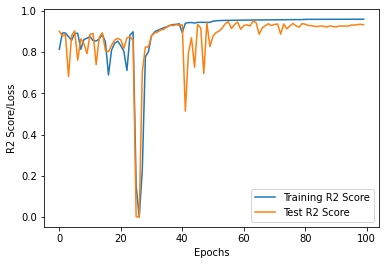

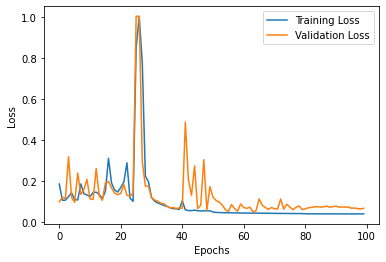

In [0]:
plt.plot(train_r2, label="Training R2 Score")
plt.plot(test_r2, label="Test R2 Score")
plt.ylabel('R2 Score/Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [0]:
train_r2

[0.8143904395869637,
 0.8937837432349465,
 0.8933902384284527,
 0.8758015728224149,
 0.8575447476574426,
 0.8910485317331163,
 0.8919881166518657,
 0.813979120833398,
 0.8619762767695773,
 0.8679637318921836,
 0.8760172133212815,
 0.8561916781956742,
 0.854325838290201,
 0.8651619965737708,
 0.8865058322367383,
 0.8496646814864672,
 0.6891368502413528,
 0.8101609580345865,
 0.8437045251505908,
 0.853946799321448,
 0.8314721703840019,
 0.80485030440692,
 0.711386832457612,
 0.8832958242201859,
 0.8992441256533195,
 0.1494952802234195,
 -0.00022048865698987008,
 0.2270737904790595,
 0.7773075431401819,
 0.8031997805827163,
 0.8802413697834859,
 0.8983078980925618,
 0.9067349857833592,
 0.9125130521923309,
 0.919004415424417,
 0.9232420194335657,
 0.9302246688220294,
 0.9344973650270354,
 0.9352120442938496,
 0.938341860684604,
 0.8956586634400983,
 0.9407274913932704,
 0.9438138801868032,
 0.9441572917986902,
 0.9418090066963369,
 0.9448397136926697,
 0.9455082490086992,
 0.9449163859970

In [0]:
test_r2

[0.9017881489525013,
 0.8794608481162132,
 0.8856716998474647,
 0.6823491701259261,
 0.8807623361766872,
 0.9035291784727936,
 0.7621290544002599,
 0.8652799772249712,
 0.8417228326424779,
 0.7925717002486512,
 0.8873199045000054,
 0.8904381089780242,
 0.7397755141227241,
 0.8724652556039023,
 0.8940885378577047,
 0.8090926470162721,
 0.8024740118353234,
 0.8342587659112092,
 0.8592246290865957,
 0.8673127050770587,
 0.8601624640164692,
 0.8186958695493264,
 0.8695136280125735,
 0.8748077963991467,
 0.8581768657204782,
 -1.6235938320674492e-05,
 -1.2404336623639267e-05,
 0.7058800488053871,
 0.825145674759459,
 0.8253440971693589,
 0.8806185270578315,
 0.8930067353275655,
 0.8984905145981602,
 0.9082697010871944,
 0.910794893512668,
 0.9229848791380665,
 0.9310633055351702,
 0.9292341662639686,
 0.9339349848795181,
 0.9308901161342293,
 0.9331455482744284,
 0.5139998485210642,
 0.7961716412460584,
 0.8700833575822181,
 0.7269945068477428,
 0.9348305353179698,
 0.9181227321394069,
 0.69